In [ ]:
!pip -q install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.3 MB/s eta 0:00:00


In [ ]:
!nvidia-smi
!pip -q install ultralytics==8.*  # YOLOv8

Mon Sep 29 16:23:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="rsuJO6r649dmZ10DLVxL")
# project = rf.workspace("test-un44y").project("detection_drill-i8geo")
# version = project.version(1)
# dataset = version.download("yolov8")
from roboflow import Roboflow
rf = Roboflow(api_key="rsuJO6r649dmZ10DLVxL")
project = rf.workspace("test-un44y").project("detection_drill-i8geo")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Detection_Drill-4 in yolov8:: 100%|██████████| 202/202 [00:00<00:00, 777.84it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
DATA_DIR = "/content/Detection_Drill-4"

In [ ]:
import glob, itertools
label_files = glob.glob(f"{DATA_DIR}/train/labels/*.txt")
print("VD file:", label_files[:3])
print("1 dòng đầu tiên:", open(label_files[0]).readline().strip())

# Mỗi dòng phải có: class_id + nhiều cặp x y (tọa độ chuẩn hoá 0–1).
# Nếu chỉ có 4 số (xc yc w h) sau class_id thì đó là detection, cần export lại YOLOv8 (Instance Segmentation).

VD file: ['/content/Detection_Drill-4/train/labels/Image__2025-06-25__14-17-38_1_bmp.rf.bf8044c87ab3bccc5a36c51d429e3c49.txt', '/content/Detection_Drill-4/train/labels/Image__2025-06-20__10-41-35_1_bmp.rf.df3daffdd29bc30406bd0f138eb41dbd.txt', '/content/Detection_Drill-4/train/labels/S20_dau_Image__2025-09-03__17-44-48_bright_bmp.rf.d3357e9b6396228667010d2b14a34e1e.txt']
1 dòng đầu tiên: 0 0.3827037773359841 0 0.3091451292246521 0 0.3091451292246521 0.0032938076416337285 0.31038767395626243 0.010869565217391304 0.327286282306163 0.06587615283267458 0.3312624254473161 0.07608695652173914 0.34791252485089463 0.13932806324110672 0.3585984095427435 0.16370223978919632 0.37152087475149104 0.1854413702239789 0.3899105367793241 0.2075098814229249 0.3923956262425447 0.21442687747035574 0.3928926441351889 0.2206851119894598 0.39214711729622265 0.2246376811594203 0.39438369781312127 0.22957839262187088 0.39363817097415504 0.23254281949934125 0.3946322067594433 0.23847167325428195 0.3981113320079

#Train YOLOv8-seg

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")  # n/m/l/x tuỳ GPU
results = model.train(
    data="/content/Detection_Drill-4/data.yaml",
    imgsz=640,
    epochs=100,
    batch=16,     # tự chọn batch tốt nhất
    workers=2,    # Colab nên để nhỏ
    device=0
)


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Detection_Drill-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

In [ ]:
yaml_path = "/content/Detection_Drill-4/data.yaml"

In [ ]:
model = YOLO("/content/runs/segment/train/weights/best.pt")  # hoặc yolo11n-seg.pt
metrics = model.val()
print(metrics.seg.map, metrics.seg.map50, metrics.seg.map75)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,649 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3221.9±1263.5 MB/s, size: 1128.7 KB)
val: Scanning /content/Detection_Drill-4/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 7/7 3.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.6it/s 1.8s
                   all          7        119      0.993          1      0.995      0.956      0.993          1      0.995      0.888
                 drill          7         56      0.999          1      0.995      0.929      0.999          1      0.995       0.91
            head_drill          7          7      0.981          1      0.995      0.995      0.981          1      0.995      0.917
                 mirro          7       

#Segment

In [ ]:
# ========= CODE ===========
import os, glob, math, cv2, numpy as np, matplotlib.pyplot as plt
import math
from ultralytics import YOLO

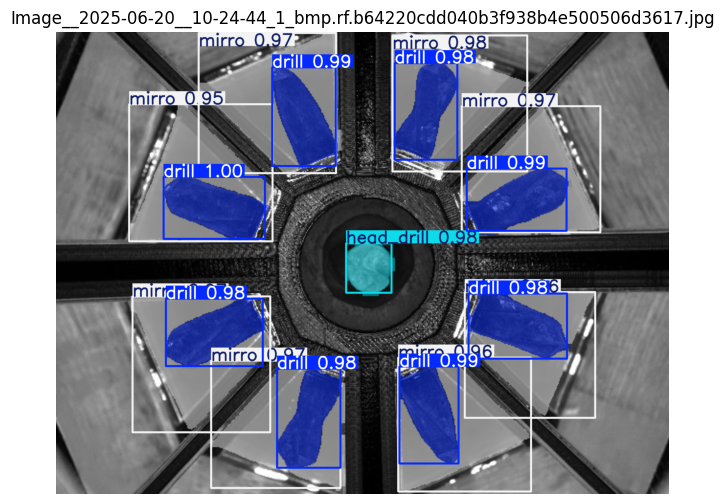

In [ ]:
# ==== CONFIG ====
MODEL_PATH = "/content/runs/segment/train/weights/last.pt"  # .pt bạn đã train
IMG_PATH   = "/content/Detection_Drill-4/test/images/Image__2025-06-20__10-24-44_1_bmp.rf.b64220cdd040b3f938b4e500506d3617.jpg"  # ảnh cần predict

model = YOLO(MODEL_PATH)
res = model.predict(
    source=IMG_PATH,
    imgsz=640,
    conf=0.20,
    iou=0.2,
    exist_ok=True,
    verbose=False
)

annotated = res[0].plot()             # BGR với mask/box/label
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title(os.path.basename(IMG_PATH))
plt.axis("off")
plt.show()
r = res[0]
cls_ids = r.boxes.cls.int().cpu().tolist()
img_bgr = cv2.imread(IMG_PATH)

In [ ]:
def order_tl_tr_br_bl(pts4):
    pts4 = np.asarray(pts4, np.float32)
    s = pts4.sum(1); d = np.diff(pts4, axis=1).ravel()
    tl = pts4[np.argmin(s)]; br = pts4[np.argmax(s)]
    tr = pts4[np.argmin(d)]; bl = pts4[np.argmax(d)]
    return np.stack([tl,tr,br,bl], 0)

def rotate_quad_to_head_top(box4, center_xy):
    # đưa CẠNH gần tâm lên phía TRÊN
    p0,p1,p2,p3 = box4.astype(np.float32)              # TL,TR,BR,BL
    mids = [(p0+p1)/2, (p1+p2)/2, (p2+p3)/2, (p3+p0)/2]# top,right,bottom,left
    cx, cy = center_xy
    d = [np.hypot(m[0]-cx, m[1]-cy) for m in mids]
    k = int(np.argmin(d))                              # cạnh gần tâm
    return np.roll(box4, -k, axis=0)                   # đưa thành cạnh trên

def crop_drill_fixed_h(img, mask_keep, box_ord, center_xy, out_h_src=650, out_w_norm=None, head_down=False):
    """
    Cắt theo min-area-rect của drill với CHIỀU CAO CỐ ĐỊNH = out_h_src (px trong ảnh gốc).
    - Không scale chiều cao theo đối tượng; lấy đúng 650 px dọc theo phương cạnh đứng của box.
    - out_w_norm: nếu set (vd 256) sẽ resize NGANG về giá trị này, giữ out_h_src (650) không đổi.
    - head_down: True nếu muốn đầu hướng xuống dưới.
    - Nền ngoài vùng segment = đen. Trả BGRA (alpha=255).
    """
    # 1) Đặt “đầu” lên trên (hoặc xuống dưới nếu head_down)
    box_top = rotate_quad_to_head_top(box_ord, center_xy)
    if head_down:
        box_top = np.roll(box_top, -2, axis=0)  # đảo top<->bottom


    # 2) Tạo hình thang CON có chiều cao đúng out_h_src theo cạnh đứng của box_top
    TL, TR, BR, BL = box_top.astype(np.float32)
    vL = BL - TL; vR = BR - TR
    hL = np.linalg.norm(vL); hR = np.linalg.norm(vR)
    uL = vL / (hL + 1e-6); uR = vR / (hR + 1e-6)

    TL2 = TL
    TR2 = TR
    BL2 = TL + uL * float(out_h_src)
    BR2 = TR + uR * float(out_h_src)
    src_quad = np.stack([TL2, TR2, BR2, BL2], 0)  # thứ tự TL,TR,BR,BL cho ô cao 650px

    # 3) Kích thước đích: chiều cao = out_h_src, chiều ngang = độ dài cạnh trên (hoặc fix out_w_norm)
    w_src = max(1.0, np.linalg.norm(TR2 - TL2))
    out_h = int(round(out_h_src))
    out_w = int(round(w_src))
    if out_w_norm is not None:
        out_w = int(out_w_norm)

    dst_quad = np.array([[0,0],[out_w-1,0],[out_w-1,out_h-1],[0,out_h-1]], np.float32)

    # 4) Warp ảnh & mask
    M = cv2.getPerspectiveTransform(src_quad.astype(np.float32), dst_quad)
    crop  = cv2.warpPerspective(img,       M, (out_w, out_h))
    mkeep = cv2.warpPerspective(mask_keep, M, (out_w, out_h), flags=cv2.INTER_NEAREST)

    # 5) Nền đen (alpha 255)
    m = (mkeep > 0).astype(np.uint8) * 255
    if crop.ndim == 2 or (crop.ndim==3 and crop.shape[2]==1):
        out_gray = cv2.bitwise_and(crop, crop, mask=m)
        out_bgr  = cv2.cvtColor(out_gray, cv2.COLOR_GRAY2BGR)
    else:
        out_bgr  = cv2.bitwise_and(crop, crop, mask=m)
    out_bgra = cv2.cvtColor(out_bgr, cv2.COLOR_BGR2BGRA)
    out_bgra[...,3] = 255
    return out_bgra

def angle_score(center_rect, cxy):
    x,y = center_rect
    th = (np.degrees(np.arctan2(y-cxy[1], x-cxy[0])) + 360.0) % 360.0
    return (th - 270.0) % 360.0  # 0° tại 12h, CW

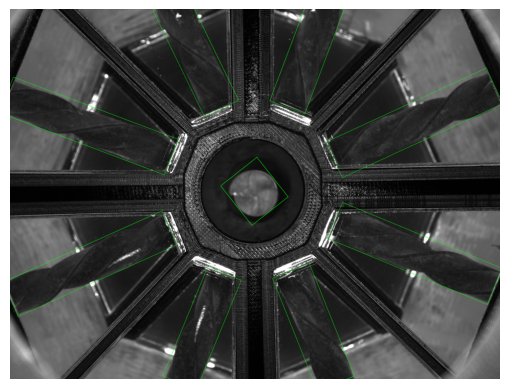

In [ ]:
vis = img_bgr.copy()
for i, poly in enumerate(r.masks.xy):
    if cls_ids[i] == 0 or cls_ids[i] == 1:
        cnt = np.int32(poly).reshape(-1, 1, 2)
        rect = cv2.minAreaRect(cnt)
        box = order_tl_tr_br_bl(np.int32(cv2.boxPoints(rect)))

        # Kiểm tra kiểu dữ liệu của box và đảm bảo đúng cấu trúc
        box = np.array(box, dtype=np.int32).reshape(-1, 1, 2)

        # Vẽ cạnh hình chữ nhật
        cv2.polylines(vis, [box], True, (0, 255, 0), 2)

# Hiển thị (nếu muốn)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
cls_ids = r.boxes.cls.int().cpu().tolist()
img = img_bgr  # grayscale hoặc BGR đều được
H, W = img.shape[:2]

# --- center: ưu tiên head_drill (class 1), không có thì tâm ảnh ---
head_idx = next((k for k,c in enumerate(cls_ids) if c==1), None)
if head_idx is not None:
    hpoly = np.asarray(r.masks.xy[head_idx], np.float32)
    cx, cy = float(hpoly[:,0].mean()), float(hpoly[:,1].mean())
else:
    cx, cy = W/2.0, H/2.0
center_xy = (cx, cy)

PAD = 15  # 10–30 là hợp lý. 50 với ảnh lớn sẽ rất nặng!
k_src = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*PAD+1, 2*PAD+1))  # TẠO 1 LẦN ngoài loop

# --- main loop: chỉ DRILL (class 0) ---
list_crop_drill, scores = [], []
for i, poly in enumerate(r.masks.xy):
    if cls_ids[i] != 0:
        continue
    cnt  = np.int32(poly).reshape(-1,1,2)
    rect = cv2.minAreaRect(cnt)
    box  = order_tl_tr_br_bl(np.int32(cv2.boxPoints(rect)))

    # mask_keep = segment ∩ box (chỉ giữ đối tượng, bỏ nền trong box)
    mask_seg = np.zeros((H,W), np.uint8); cv2.fillPoly(mask_seg, [np.int32(poly)], 255)
    box_poly = np.rint(box).astype(np.int32).reshape(-1,1,2)
    box_poly[:,:,0] = np.clip(box_poly[:,:,0], 0, W-1)
    box_poly[:,:,1] = np.clip(box_poly[:,:,1], 0, H-1)
    mask_box = np.zeros((H,W), np.uint8); cv2.fillPoly(mask_box, [box_poly], 255)

    mask_keep = cv2.bitwise_and(mask_seg, mask_box)

    mask_keep = cv2.dilate(mask_keep, k_src, iterations=1)

    crop_bgra = crop_drill_fixed_h(
        img=img_bgr,
        mask_keep=mask_keep,
        box_ord=box,
        center_xy=(cx, cy),
        out_h_src=700,        # CHỈNH Ở ĐÂY: chiều cao cố định 650 px theo ảnh gốc
        out_w_norm=256,       # (tuỳ chọn) chuẩn hoá chiều rộng; bỏ nếu muốn giữ nguyên theo box
        head_down=False       # True nếu muốn đầu hướng xuống
    )
    list_crop_drill.append(crop_bgra)
    scores.append(angle_score(rect[0], center_xy))

# --- sort từ 12h theo chiều kim đồng hồ ---
order = np.argsort(scores)
list_crop_drill = [list_crop_drill[k] for k in order]
grid9 = {i+1: cv2.rotate(list_crop_drill[i], cv2.ROTATE_180) for i in range(8)}

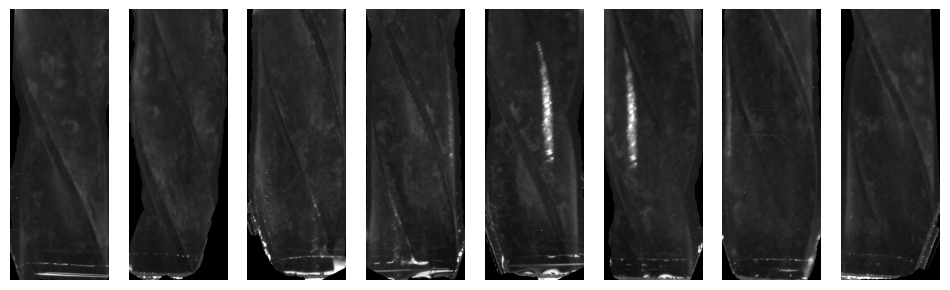

In [ ]:
fig, ax =  plt.subplots(1, 8, figsize=(12, 12))
for i in range(8):
  ax[i].imshow(grid9[i+1])
  ax[i].axis("off")

In [ ]:
img_2 = cv2.imread("/content/s102_s102_11-05-57_2.bmp")
cls_ids = r.boxes.cls.int().cpu().tolist()
img = img_2  # grayscale hoặc BGR đều được
# --- main loop: chỉ DRILL (class 0) ---
list_crop_drill, scores = [], []
for i, poly in enumerate(r.masks.xy):
    if cls_ids[i] != 0:
        continue
    cnt  = np.int32(poly).reshape(-1,1,2)
    rect = cv2.minAreaRect(cnt)
    box  = order_tl_tr_br_bl(np.int32(cv2.boxPoints(rect)))

    # mask_keep = segment ∩ box (chỉ giữ đối tượng, bỏ nền trong box)
    mask_seg = np.zeros((H,W), np.uint8); cv2.fillPoly(mask_seg, [np.int32(poly)], 255)
    box_poly = np.rint(box).astype(np.int32).reshape(-1,1,2)
    box_poly[:,:,0] = np.clip(box_poly[:,:,0], 0, W-1)
    box_poly[:,:,1] = np.clip(box_poly[:,:,1], 0, H-1)
    mask_box = np.zeros((H,W), np.uint8); cv2.fillPoly(mask_box, [box_poly], 255)
    mask_keep = cv2.bitwise_and(mask_seg, mask_box)
    mask_keep = cv2.dilate(mask_keep, k_src, iterations=1)
    crop_bgra = crop_drill_fixed_h(
        img=img_2,
        mask_keep=mask_keep,
        box_ord=box,
        center_xy=(cx, cy),
        out_h_src=700,
        out_w_norm=256,       # (tuỳ chọn) chuẩn hoá chiều rộng; bỏ nếu muốn giữ nguyên theo box
        head_down=False       # True nếu muốn đầu hướng xuống
    )
    list_crop_drill.append(crop_bgra)
    scores.append(angle_score(rect[0], center_xy))

# --- sort từ 12h theo chiều kim đồng hồ ---
order = np.argsort(scores)
list_crop_drill = [list_crop_drill[k] for k in order]
grid9 = {i+1: cv2.rotate(list_crop_drill[i], cv2.ROTATE_180) for i in range(8)}

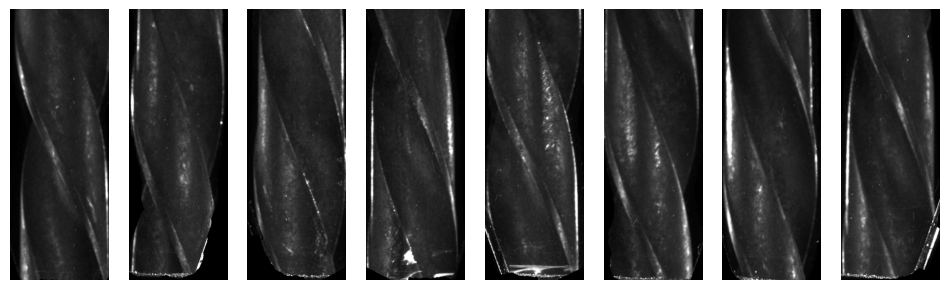

In [ ]:
fig, ax =  plt.subplots(1, 8, figsize=(12, 12))
for i in range(8):
  ax[i].imshow(grid9[i+1])
  ax[i].axis("off")

#Chuyển đổi Bounding Box

In [ ]:
import json, os, pandas as pd

coco_path = "/content/MUI_KHOAN_KLTN-11/train/_annotations.coco.json"
img_path  = "/content/MUI_KHOAN_KLTN-11/train/s102_s102_11-03-28_1_bmp.rf.9d09e73ef5540ace52bd816b98ba0b2e.jpg"
img_name  = os.path.basename(img_path)

# Đọc COCO
with open(coco_path, "r", encoding="utf-8") as f:
    coco = json.load(f)

id2name = {c["id"]: c["name"] for c in coco["categories"]}

# Tìm image_id theo file_name
im = next((im for im in coco["images"] if im["file_name"] == img_name), None)
assert im is not None, "Không thấy ảnh trong COCO"
img_id = im["id"]

# Tạo DataFrame df
rows = []
for ann in coco["annotations"]:
    if ann["image_id"] != img_id:
        continue
    x, y, w, h = ann["bbox"]
    rows.append({
        "image_file": img_name,
        "image_id": img_id,
        "category_id": ann["category_id"],
        "category_name": id2name.get(ann["category_id"], str(ann["category_id"])),
        "bbox_x": x, "bbox_y": y, "bbox_w": w, "bbox_h": h,
        "ann_id": ann.get("id")
    })
df = pd.DataFrame(rows)

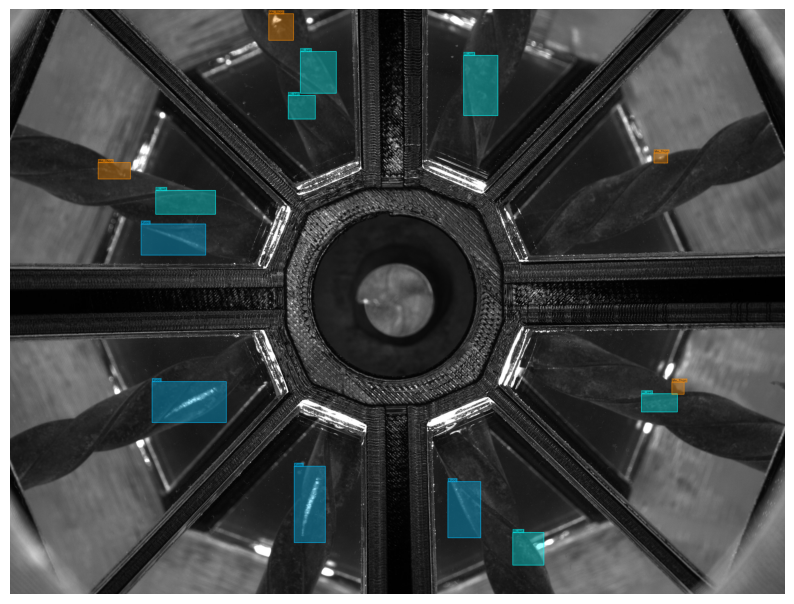

In [ ]:
# Đọc ảnh gốc (BGR)
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
assert img is not None, f"Không mở được ảnh: {img_path}"
H, W = img.shape[:2]

# ===== Bảng màu (BGR cho OpenCV) =====
CLASS_COLOR = {
    "Gay":     ( 80, 255,  60),   # lime/green
    "Me_Dau":  (200,  70, 255),   # purple
    "Me_Than": (  0, 140, 255),   # orange
    "Mon_Dau": (  0,   0, 255),   # red/pink
    "Ri_set":  (255, 255,   0),   # cyan/teal
    "Xuoc":    (255, 191,   0),   # light blue
}
def color_of(name):  # fallback nếu class lạ
    return CLASS_COLOR.get(str(name), (0, 255, 255))  # default: yellow

overlay = img.copy()
out = img.copy()
alpha = 0.35  # độ trong suốt cho vùng bbox tô màu
list_bbox = []
for _, row in df.iterrows():
    x, y, w, h = row["bbox_x"], row["bbox_y"], row["bbox_w"], row["bbox_h"]
    cls_name = str(row["category_name"])

    # Clip & int
    x1 = max(0, min(int(round(x)),     W-1))
    y1 = max(0, min(int(round(y)),     H-1))
    x2 = max(0, min(int(round(x+w)),   W))
    y2 = max(0, min(int(round(y+h)),   H))
    list_bbox.append([x1,y1,x2,y2])
    if x2 <= x1 or y2 <= y1:
        continue

    color = color_of(cls_name)

    # Tô nền bán trong suốt + viền
    cv2.rectangle(overlay, (x1, y1), (x2, y2), color, thickness=-1)
    cv2.rectangle(out,     (x1, y1), (x2, y2), color, thickness=2)

    # Nhãn lớp trên nền màu
    label = cls_name
    (tw, th), base = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.55, 1)
    y_text = max(y1, th + 4)
    cv2.rectangle(out, (x1, y_text - th - 4), (x1 + tw + 6, y_text + 2), color, -1)
    cv2.putText(out, label, (x1 + 3, y_text - 2),
                cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 0), 1, cv2.LINE_AA)

# Trộn overlay bán trong suốt lên out
out = cv2.addWeighted(overlay, alpha, out, 1 - alpha, 0.0)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
DRILL_ID = 0         # class segment "thân mũi khoan"
HEAD_ID  = 1         # class "đầu mũi khoan"
OUT_H    = 700       # chiều cao cố định theo ảnh gốc (px)
OUT_W_NORM = 256     # nếu None: giữ theo độ dài cạnh trên; ngược lại ép bề ngang
PAD = 15             # nới mask 10–30px

In [ ]:
def crop_drill_fixed_h_with_M(img, mask_keep, box_ord, center_xy,
                              out_h_src=700, out_w_norm=None,
                              head_down=False, rotate180=False):
    # 1) đặt cạnh gần tâm lên trên
    box_top = rotate_quad_to_head_top(box_ord, center_xy)
    if head_down:
        box_top = np.roll(box_top, -2, axis=0)

    # 2) hình thang con cao cố định
    TL, TR, BR, BL = box_top.astype(np.float32)
    vL = BL - TL; vR = BR - TR
    hL = np.linalg.norm(vL); hR = np.linalg.norm(vR)
    uL = vL / (hL + 1e-6); uR = vR / (hR + 1e-6)

    TL2 = TL; TR2 = TR
    BL2 = TL + uL * float(out_h_src)
    BR2 = TR + uR * float(out_h_src)
    src_quad = np.stack([TL2, TR2, BR2, BL2], 0)

    w_src = max(1.0, np.linalg.norm(TR2 - TL2))
    out_h = int(round(out_h_src))
    out_w = int(round(w_src)) if out_w_norm is None else int(out_w_norm)
    dst_quad = np.array([[0,0],[out_w-1,0],[out_w-1,out_h-1],[0,out_h-1]], np.float32)

    # 3) homography
    M = cv2.getPerspectiveTransform(src_quad.astype(np.float32), dst_quad)
    if rotate180:
        R180 = np.array([[-1, 0, out_w-1],
                         [ 0,-1, out_h-1],
                         [ 0, 0,       1]], dtype=np.float32)
        M = R180 @ M

    crop  = cv2.warpPerspective(img,       M, (out_w, out_h))
    mkeep = cv2.warpPerspective(mask_keep, M, (out_w, out_h), flags=cv2.INTER_NEAREST)

    m = (mkeep > 0).astype(np.uint8) * 255
    if crop.ndim == 2 or (crop.ndim==3 and crop.shape[2]==1):
        out_gray = cv2.bitwise_and(crop, crop, mask=m)
        out_bgr  = cv2.cvtColor(out_gray, cv2.COLOR_GRAY2BGR)
    else:
        out_bgr  = cv2.bitwise_and(crop, crop, mask=m)
    out_bgra = cv2.cvtColor(out_bgr, cv2.COLOR_BGR2BGRA)
    out_bgra[...,3] = 255
    return out_bgra, M, (out_w, out_h), src_quad, mkeep


def seg_to_poly(ann):
    """
    Trả polygon (N,2) từ COCO ann['segmentation'] nếu có;
    nếu không có, fallback về 4 đỉnh bbox (TL,TR,BR,BL).
    """
    seg = ann.get("segmentation", None)
    if isinstance(seg, list) and len(seg)>0 and isinstance(seg[0], list):
        # polygon kiểu Roboflow: [ [x1,y1,x2,y2,...] ]
        pts = np.array(seg[0], np.float32).reshape(-1,2)
        return pts
    # Fallback: bbox → hình chữ nhật
    x,y,w,h = ann["bbox"]; x2, y2 = x+w, y+h
    return np.array([[x,y],[x2,y],[x2,y2],[x,y2]], np.float32)

def warp_points(pts_xy, M):
    pts = np.asarray(pts_xy, np.float32).reshape(-1,1,2)
    return cv2.perspectiveTransform(pts, M).reshape(-1,2)

def warp_bboxes_xyxy(bxs_xyxy, M, out_w, out_h, clip=True):
    out = []
    for (x1,y1,x2,y2) in np.asarray(bxs_xyxy, np.float32):
        corners = np.array([[x1,y1],[x2,y1],[x2,y2],[x1,y2]], np.float32)
        wcorn   = warp_points(corners, M)
        x_min = float(wcorn[:,0].min()); y_min = float(wcorn[:,1].min())
        x_max = float(wcorn[:,0].max()); y_max = float(wcorn[:,1].max())
        if clip:
            x_min = max(0.0, min(x_min, out_w-1)); x_max = max(0.0, min(x_max, out_w-1))
            y_min = max(0.0, min(y_min, out_h-1)); y_max = max(0.0, min(y_max, out_h-1))
        out.append([x_min,y_min,x_max,y_max])
    return np.asarray(out, np.float32)

def pick_bboxes_inside_poly(df_bxs, poly_xy):
    """
    Lọc các bbox có TÂM nằm trong polygon.
    df_bxs: DataFrame con (các bbox bạn muốn xét), cần cột bbox_x,bbox_y,bbox_w,bbox_h
    """
    sel_rows = []
    poly_i32 = np.int32(poly_xy).reshape(-1,1,2)
    for idx, r in df_bxs.iterrows():
        cx = r["bbox_x"] + r["bbox_w"]/2.0
        cy = r["bbox_y"] + r["bbox_h"]/2.0
        if cv2.pointPolygonTest(poly_i32, (float(cx),float(cy)), False) >= 0:
            sel_rows.append(idx)
    return sel_rows

# def filter_bboxes_in_crop_by_mask(df_bxs, xyxy_warp, mask_crop, thr=0.5):
#     H, W = mask_crop.shape[:2]
#     keep_idx, ratios = [], []
#     for (idx, (x1,y1,x2,y2)) in zip(df_bxs.index, xyxy_warp):
#         x1i = max(0, min(int(np.floor(x1)), W))
#         x2i = max(0, min(int(np.ceil (x2)), W))
#         y1i = max(0, min(int(np.floor(y1)), H))
#         y2i = max(0, min(int(np.ceil (y2)), H))
#         w = x2i - x1i; h = y2i - y1i
#         if w <= 0 or h <= 0:
#             continue
#         roi = mask_crop[y1i:y2i, x1i:x2i]
#         inter = int(cv2.countNonZero(roi))
#         ratio = inter / float(max(1, w*h))
#         if ratio >= thr:
#             keep_idx.append(idx); ratios.append(ratio)
#     return keep_idx, ratios

def filter_bboxes_in_crop_by_mask(df_bxs, xyxy_warp, mask_crop, thr=0.5,
                                  min_w=None, min_h=None, min_area=None):
    """
    Lọc theo:
      1) ratio = area(mask ∩ bbox) / area(bbox) >= thr
      2) w >= min_w, h >= min_h, area >= min_area  (ngưỡng tối thiểu)
    Nếu min_* không truyền, sẽ tính theo tỉ lệ kích thước crop.
    """
    H, W = mask_crop.shape[:2]

    # ngưỡng mặc định (tỉ lệ theo size crop)
    if min_w    is None: min_w    = max(8,  int(0.2 * W))
    if min_h    is None: min_h    = max(8,  int(0.2 * H))
    if min_area is None: min_area = max(64, int(0.2 * W * H))

    keep_idx, ratios = [], []
    for (idx, (x1, y1, x2, y2)) in zip(df_bxs.index, xyxy_warp):
        # làm tròn & clip biên
        x1i = max(0, min(int(np.floor(x1)), W))
        x2i = max(0, min(int(np.ceil (x2)), W))
        y1i = max(0, min(int(np.floor(y1)), H))
        y2i = max(0, min(int(np.ceil (y2)), H))

        w = x2i - x1i; h = y2i - y1i
        area_b = w * h
        if w < min_w or h < min_h or area_b < min_area:
            continue

        roi = mask_crop[y1i:y2i, x1i:x2i]           # 0/255
        inter = int(cv2.countNonZero(roi))          # số pixel giao
        ratio = inter / float(area_b)

        if ratio >= thr:
            keep_idx.append(idx)
            ratios.append(ratio)

    return keep_idx, ratios

In [ ]:
H, W = img.shape[:2]
r = res[0]

# Bảng bbox “đi theo segment”: mọi bbox khác DRILL/HEAD (tuỳ nhu cầu)
df_follow = df[(df["image_id"]==img_id) & (~df["category_id"].isin([DRILL_ID, HEAD_ID]))].copy()

# ==== 3) Xử lý từng segment DRILL ====
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*PAD+1, 2*PAD+1))
results = []  # list các crop: img, bbox_warp_df, meta

for i, poly in enumerate(r.masks.xy):
    if cls_ids[i] != 0:
        continue
    cnt  = np.int32(poly).reshape(-1,1,2)
    rect = cv2.minAreaRect(cnt)                                # (center,(w,h),angle)
    box4 = order_tl_tr_br_bl(np.int32(cv2.boxPoints(rect)))    # TL,TR,BR,BL

    # 3.2) mask_keep = segment ∩ box (giới hạn vùng warp) + nới biên
    mask_seg = np.zeros((H,W), np.uint8); cv2.fillPoly(mask_seg, [np.int32(poly)], 255)
    box_poly = np.int32(box4).reshape(-1,1,2)
    box_poly[:,:,0] = np.clip(box_poly[:,:,0], 0, W-1)
    box_poly[:,:,1] = np.clip(box_poly[:,:,1], 0, H-1)
    mask_box = np.zeros((H,W), np.uint8); cv2.fillPoly(mask_box, [box_poly], 255)
    mask_keep = cv2.bitwise_and(mask_seg, mask_box)
    mask_keep = cv2.dilate(mask_keep, kernel, iterations=1)

    # 3.3) CẮT + nhận ma trận warp M
    crop_bgra, M_rot, (out_w,out_h), _, mkeep_warp = crop_drill_fixed_h_with_M(
        img=img_bgr,
        mask_keep=mask_keep,      # mask đã dilate
        box_ord=box4,
        center_xy=center_xy,
        out_h_src=OUT_H,
        out_w_norm=OUT_W_NORM,
        head_down=False,
        rotate180=True
    )
    # 1) chọn tập bbox ứng viên (ví dụ: mọi bbox khác DRILL/HEAD)
    df_child = df_follow.copy()

    # 2) warp toàn bộ bbox sang crop-space
    xyxy_src = np.stack([
        df_child["bbox_x"].values,
        df_child["bbox_y"].values,
        (df_child["bbox_x"]+df_child["bbox_w"]).values,
        (df_child["bbox_y"]+df_child["bbox_h"]).values], axis=1).astype(np.float32)
    xyxy_warp = warp_bboxes_xyxy(xyxy_src, M_rot, out_w, out_h, clip=True)

    # 3) lọc theo tỉ lệ phủ >= 0.8 TRÊN mkeep_warp (mask đã dilate & đã warp)
    sel_idx, cover_ratio = filter_bboxes_in_crop_by_mask(df_child, xyxy_warp, mkeep_warp, thr=0.8)
    df_child = df_child.loc[sel_idx].copy()
    if len(df_child) > 0:
        xyxy_warp = xyxy_warp[sel_idx]
        df_child["warp_x1"] = xyxy_warp[:,0]; df_child["warp_y1"] = xyxy_warp[:,1]
        df_child["warp_x2"] = xyxy_warp[:,2]; df_child["warp_y2"] = xyxy_warp[:,3]
        df_child["warp_w"]  = df_child["warp_x2"] - df_child["warp_x1"]
        df_child["warp_h"]  = df_child["warp_y2"] - df_child["warp_y1"]
        df_child["overlap_ratio"] = cover_ratio


    # 3.6) angle score để sắp xếp 12h→… (CW)
    score = angle_score(rect[0], center_xy)

    results.append({
        "angle_score": score,
        "crop_img": crop_bgra,          # BGRA
        "crop_size": (out_w, out_h),
        "warp_M": M_rot,
        "child_bboxes_df": df_child     # các bbox đã warp theo crop
    })

In [ ]:
# ==== 4) Sắp xếp theo “mặt đồng hồ” và (tuỳ chọn) xoay 180° khi hiển thị ====
results = sorted(results, key=lambda d: d["angle_score"])
results[0]["child_bboxes_df"]

,image_file,image_id,category_id,category_name,bbox_x,bbox_y,bbox_w,bbox_h,ann_id,warp_x1,warp_y1,warp_x2,warp_y2,warp_w,warp_h,overlap_ratio
3,s102_s102_11-03-28_1_bmp.rf.9d09e73ef5540ace52...,752,5,Ri_set,2355,240,177.59,312.96,6667,22.160198,79.470886,251.808762,434.656647,229.64856,355.18576,0.995787


In [ ]:
results[3]["child_bboxes_df"]

,image_file,image_id,category_id,category_name,bbox_x,bbox_y,bbox_w,bbox_h,ann_id,warp_x1,warp_y1,warp_x2,warp_y2,warp_w,warp_h,overlap_ratio
2,s102_s102_11-03-28_1_bmp.rf.9d09e73ef5540ace52...,752,6,Xuoc,2273,2452,171.22,292.15,6666,115.719551,96.344147,255.0,430.823822,139.280457,334.479675,0.891706


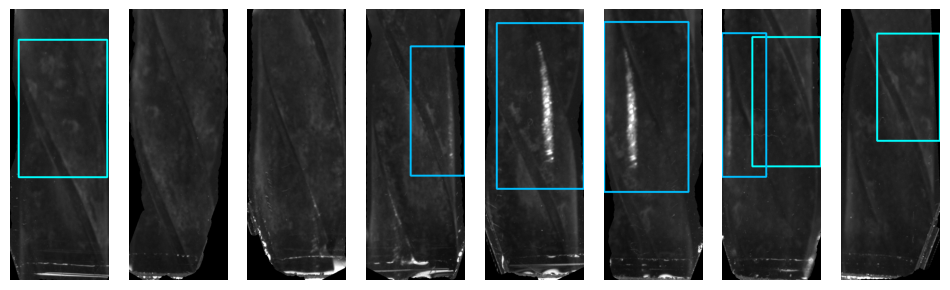

In [ ]:
# ===== Bảng màu (BGR cho OpenCV) =====
CLASS_COLOR = {
    "Gay":     ( 80, 255,  60),   # lime/green
    "Me_Dau":  (200,  70, 255),   # purple
    "Me_Than": (  0, 140, 255),   # orange
    "Mon_Dau": (  0,   0, 255),   # red/pink
    "Ri_set":  (255, 255,   0),   # cyan/teal
    "Xuoc":    (255, 191,   0),   # light blue
}
def color_of(name):  # fallback nếu class lạ
    return CLASS_COLOR.get(str(name), (0, 255, 255))  # default: yellow

fig, ax =  plt.subplots(1, 8, figsize=(12, 12))
for i in range(8):
  dbg = results[i]["crop_img"].copy()

  for _, r in results[i]["child_bboxes_df"].iterrows():
      p1 = (int(r["warp_x1"]), int(r["warp_y1"]))
      p2 = (int(r["warp_x2"]), int(r["warp_y2"]))
      cv2.rectangle(dbg, p1, p2, color_of(r["category_name"]), 4)
  dbg = cv2.cvtColor(dbg, cv2.COLOR_BGR2RGB)
  ax[i].imshow(dbg)
  ax[i].axis("off")

#Tính chiều cao background

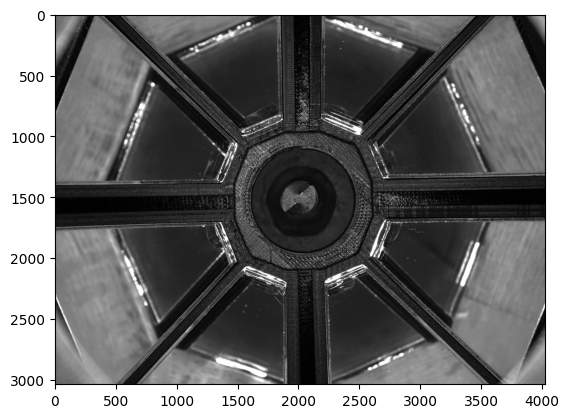

In [ ]:
img_path = "/content/Detection_Drill-1/train/images/Image__2025-06-20__10-40-14_1_bmp.rf.eeb047f51f42e45bcd365f298c0146ee.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
h, w, _ = img.shape
with open('/content/Detection_Drill-1/train/labels/Image__2025-06-20__10-40-14_1_bmp.rf.eeb047f51f42e45bcd365f298c0146ee.txt', mode='r') as file:
    lines = file.read().strip().split('\n')
    labels, segments = [], []
    for line in lines:
        c, *xy = line.strip().split(' ')
        s = (np.array(xy, dtype=np.float32).reshape(-1, 2) * [w, h]).astype(np.int32)
        if int(c) == 0 and len(s) == 5:
            s = s[:-1]
        labels.append(int(c))
        segments.append(s)
labels = np.array(labels, dtype=int)

In [ ]:
idxs = np.where(labels == 2)[0]

In [ ]:
idxs

array([1, 2, 3, 4, 5, 6, 7, 8])

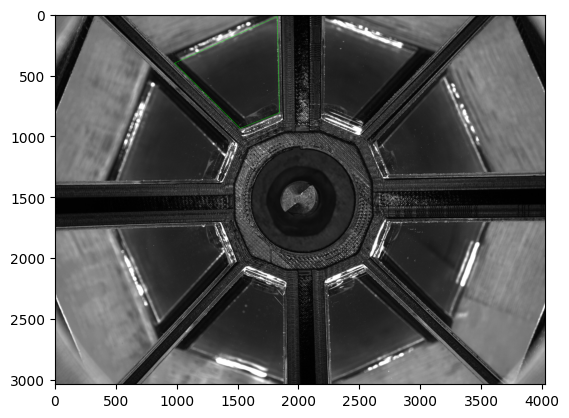

In [ ]:
x = cv2.drawContours(image=img.copy(), contours=[segments[idxs[0]]], contourIdx=-1, color=(0, 255, 0), thickness=2)
plt.imshow(x)

In [ ]:
def _angle_diff_180(a, b):
    d = abs(a - b) % 180.0
    return 180.0 - d if d > 90 else d

def find_rotate_to_vertical_angle(pts4):
    """pts4: numpy array shape (4,2) theo thứ tự viền polygon."""
    pts4 = np.asarray(pts4, dtype=np.float64)
    v = np.roll(pts4, -1, axis=0) - pts4                 # 4 vector cạnh
    ang = np.degrees(np.arctan2(v[:,1], v[:,0]))         # góc từng cạnh

    # Tìm cặp cạnh song song nhất (khác nhau ~ 0° hoặc ~180°)
    pairs = [(i, j, _angle_diff_180(ang[i], ang[j]))
             for i in range(4) for j in range(i+1, 4)]
    i, j, _ = min(pairs, key=lambda x: x[2])

    # Lấy hướng trung bình của 2 cạnh song song (bỏ dấu đối hướng)
    u = v / np.linalg.norm(v, axis=1, keepdims=True)
    ui, uj = u[i], u[j]
    if np.dot(ui, uj) < 0: uj = -uj
    uavg = (ui + uj) / 2.0
    theta = np.degrees(np.arctan2(uavg[1], uavg[0]))     # hướng cặp song song

    # Chọn góc xoay nhỏ nhất để đưa hướng này về thẳng đứng (±90°)
    a1 = 90.0 - theta
    a2 = -90.0 - theta
    angle = a1 if abs(a1) < abs(a2) else a2              # độ, + là CCW, − là CW
    return angle

def rotate_image_and_points(img, pts, angle_deg, fill=0):
    """
    Xoay ảnh quanh tâm ảnh (không cắt), nền trống tô màu 'fill'.
    Đồng thời transform toạ độ pts theo affine.
    """
    h, w = img.shape[:2]
    c = (w / 2.0, h / 2.0)
    M = cv2.getRotationMatrix2D(c, angle_deg, 1.0)

    # Tính kích thước canvas mới để không bị cắt
    cos, sin = abs(M[0,0]), abs(M[0,1])
    new_w = int(h * sin + w * cos)
    new_h = int(h * cos + w * sin)
    # Bù dịch để tâm ảnh nằm giữa canvas mới
    M[0,2] += (new_w / 2.0) - c[0]
    M[1,2] += (new_h / 2.0) - c[1]

    rotated = cv2.warpAffine(img, M, (new_w, new_h),
                             flags=cv2.INTER_LINEAR,
                             borderValue=(fill, fill, fill))

    # Biến đổi toạ độ điểm
    pts_h = np.hstack([pts.astype(np.float64), np.ones((len(pts), 1))])
    pts_rot = (M @ pts_h.T).T
    return rotated, pts_rot


In [ ]:
list_trapeze = []
for i in idxs:
  # ===== Ví dụ với dữ liệu của bạn =====
  pts = segments[i]

  angle = find_rotate_to_vertical_angle(pts)
  print(f"Góc xoay: {angle:.2f}°")   # ~ -21.08°

  # Nếu muốn chỉ xoay điểm quanh trọng tâm (không có ảnh):
  center = pts.mean(axis=0)
  rad = math.radians(angle)
  R = np.array([[math.cos(rad), -math.sin(rad)],
                [math.sin(rad),  math.cos(rad)]])
  pts_rot = (pts - center) @ R.T + center
  list_trapeze.append(np.round(pts_rot).astype(int))

Góc xoay: -66.82°
Góc xoay: -21.74°
Góc xoay: 24.10°
Góc xoay: 69.97°
Góc xoay: -66.03°
Góc xoay: -19.85°
Góc xoay: 22.12°
Góc xoay: 70.74°


invalid value encountered in divide


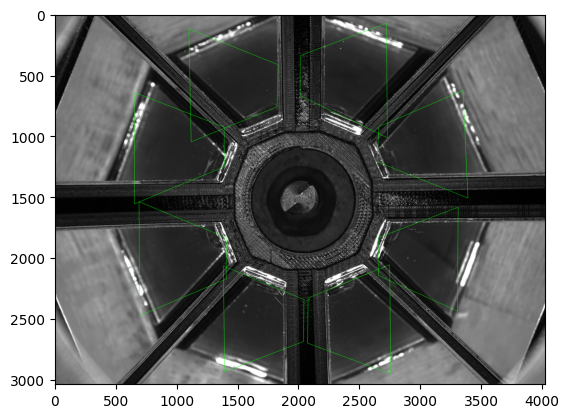

In [ ]:
x = cv2.drawContours(image=img.copy(), contours=list_trapeze, contourIdx=-1, color=(0, 255, 0), thickness=2)
plt.imshow(x,cmap='gray')

In [ ]:
for pts in list_trapeze:
  A = pts[0]
  B = pts[1]
  C = pts[2]
  D = pts[3]

  # độ dài AD, BC
  AD = np.linalg.norm(A-D)
  BC = np.linalg.norm(B-C)

  # diện tích (shoelace)
  x,y = pts[:,0], pts[:,1]
  S = 0.5*abs(np.dot(x, np.roll(y,-1)) - np.dot(y, np.roll(x,-1)))

  h = 2*S/(AD+BC)
  print(h)


590.122014428268
574.6185448470701
587.6811242201449
654.3689559776966
589.6182082856619
535.8816278161604
540.9074202841556
712.3241990467321


#code_test

In [ ]:
# --- helpers ---
def order_tl_tr_br_bl(pts4):
    pts4 = np.asarray(pts4, np.float32)
    s = pts4.sum(1); d = np.diff(pts4, axis=1).ravel()
    tl = pts4[np.argmin(s)]; br = pts4[np.argmax(s)]
    tr = pts4[np.argmin(d)]; bl = pts4[np.argmax(d)]
    return np.stack([tl,tr,br,bl], 0)

def rotate_quad_to_head_top(box4, center):
    p0,p1,p2,p3 = box4.astype(np.float32)                 # TL,TR,BR,BL
    mids = [(p0+p1)/2, (p1+p2)/2, (p2+p3)/2, (p3+p0)/2]   # top,right,bottom,left
    d = [np.hypot(m[0]-center[0], m[1]-center[1]) for m in mids]
    k = int(np.argmin(d))                                 # cạnh gần tâm -> "đầu"
    return np.roll(box4, -(k+2), axis=0)                      # đưa lên trên

def crop_drill(img, mask_keep, box_ord, center_xy, pad = 30, target_wh=(256,862)):
    # định hướng đầu lên, warp -> portrait, resize, gắn alpha
    box_top = rotate_quad_to_head_top(box_ord, center_xy)
    k_src = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*pad+1, 2*pad+1))
    mask_keep = cv2.dilate(mask_keep, k_src, iterations=1)
    w = int(max(np.linalg.norm(box_top[1]-box_top[0]), np.linalg.norm(box_top[2]-box_top[3])))
    h = int(max(np.linalg.norm(box_top[2]-box_top[1]), np.linalg.norm(box_top[3]-box_top[0])))
    if h >= w:
        dst = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]], np.float32); out_wh=(w,h)
    else:
        dst = np.array([[0,0],[h-1,0],[h-1,w-1],[0,w-1]], np.float32); out_wh=(h,w)
    M = cv2.getPerspectiveTransform(box_top.astype(np.float32), dst)
    crop  = cv2.warpPerspective(img,       M, out_wh)
    mkeep = cv2.warpPerspective(mask_keep, M, out_wh, flags=cv2.INTER_NEAREST)

    crop  = cv2.resize(crop,  target_wh, interpolation=cv2.INTER_LINEAR)
    mkeep = cv2.resize(mkeep, target_wh, interpolation=cv2.INTER_NEAREST)
    # if mkeep.max()==1: mkeep=(mkeep*255).astype(np.uint8)
    # if crop.ndim==2 or (crop.ndim==3 and crop.shape[2]==1):
    #     bgra = cv2.cvtColor(crop, cv2.COLOR_GRAY2BGRA)
    # else:
    #     bgra = cv2.cvtColor(crop, cv2.COLOR_BGR2BGRA)
    # bgra[...,3]=mkeep
    # Chuẩn hoá mask 0/255
    mkeep = (mkeep > 0).astype(np.uint8) * 255

    # Tô nền trống = đen bằng bitwise_and
    if crop.ndim == 2 or (crop.ndim == 3 and crop.shape[2] == 1):
        # ảnh xám
        out_gray = cv2.bitwise_and(crop, crop, mask=mkeep)        # nền = 0 (đen)
        out_bgr  = cv2.cvtColor(out_gray, cv2.COLOR_GRAY2BGR)
    else:
        # ảnh màu
        out_bgr  = cv2.bitwise_and(crop, crop, mask=mkeep)        # nền = (0,0,0)

    # (tuỳ chọn) xuất BGRA OPAQUE (alpha = 255 toàn ảnh)
    out_bgra = cv2.cvtColor(out_bgr, cv2.COLOR_BGR2BGRA)
    out_bgra[..., 3] = 255
    return out_bgra

def angle_score(center_rect, cxy):
    x,y = center_rect
    th = (np.degrees(np.arctan2(y-cxy[1], x-cxy[0])) + 360.0) % 360.0
    return (th - 270.0) % 360.0  # 0° tại 12h, CW

In [ ]:
# --- helpers ---
def order_tl_tr_br_bl(pts4):
    pts4 = np.asarray(pts4, np.float32)
    s = pts4.sum(1); d = np.diff(pts4, axis=1).ravel()
    tl = pts4[np.argmin(s)]; br = pts4[np.argmax(s)]
    tr = pts4[np.argmin(d)]; bl = pts4[np.argmax(d)]
    return np.stack([tl,tr,br,bl], 0)

def rotate_quad_to_head_top(box4, center):
    p0,p1,p2,p3 = box4.astype(np.float32)                 # TL,TR,BR,BL
    mids = [(p0+p1)/2, (p1+p2)/2, (p2+p3)/2, (p3+p0)/2]   # top,right,bottom,left
    d = [np.hypot(m[0]-center[0], m[1]-center[1]) for m in mids]
    k = int(np.argmin(d))                                 # cạnh gần tâm -> "đầu"
    return np.roll(box4, -(k+2), axis=0)                      # đưa lên trên

def crop_drill(img, mask_keep, box_ord, center_xy, pad = 30, target_wh=(256,862)):
    # định hướng đầu lên, warp -> portrait, resize, gắn alpha
    box_top = rotate_quad_to_head_top(box_ord, center_xy)
    k_src = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*pad+1, 2*pad+1))
    mask_keep = cv2.dilate(mask_keep, k_src, iterations=1)
    w = int(max(np.linalg.norm(box_top[1]-box_top[0]), np.linalg.norm(box_top[2]-box_top[3])))
    h = int(max(np.linalg.norm(box_top[2]-box_top[1]), np.linalg.norm(box_top[3]-box_top[0])))
    if h >= w:
        dst = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]], np.float32); out_wh=(w,h)
    else:
        dst = np.array([[0,0],[h-1,0],[h-1,w-1],[0,w-1]], np.float32); out_wh=(h,w)
    M = cv2.getPerspectiveTransform(box_top.astype(np.float32), dst)
    crop  = cv2.warpPerspective(img,       M, out_wh)
    mkeep = cv2.warpPerspective(mask_keep, M, out_wh, flags=cv2.INTER_NEAREST)

    crop  = cv2.resize(crop,  target_wh, interpolation=cv2.INTER_LINEAR)
    mkeep = cv2.resize(mkeep, target_wh, interpolation=cv2.INTER_NEAREST)
    # if mkeep.max()==1: mkeep=(mkeep*255).astype(np.uint8)
    # if crop.ndim==2 or (crop.ndim==3 and crop.shape[2]==1):
    #     bgra = cv2.cvtColor(crop, cv2.COLOR_GRAY2BGRA)
    # else:
    #     bgra = cv2.cvtColor(crop, cv2.COLOR_BGR2BGRA)
    # bgra[...,3]=mkeep
    # Chuẩn hoá mask 0/255
    mkeep = (mkeep > 0).astype(np.uint8) * 255

    # Tô nền trống = đen bằng bitwise_and
    if crop.ndim == 2 or (crop.ndim == 3 and crop.shape[2] == 1):
        # ảnh xám
        out_gray = cv2.bitwise_and(crop, crop, mask=mkeep)        # nền = 0 (đen)
        out_bgr  = cv2.cvtColor(out_gray, cv2.COLOR_GRAY2BGR)
    else:
        # ảnh màu
        out_bgr  = cv2.bitwise_and(crop, crop, mask=mkeep)        # nền = (0,0,0)

    # (tuỳ chọn) xuất BGRA OPAQUE (alpha = 255 toàn ảnh)
    out_bgra = cv2.cvtColor(out_bgr, cv2.COLOR_BGR2BGRA)
    out_bgra[..., 3] = 255
    return out_bgra

def angle_score(center_rect, cxy):
    x,y = center_rect
    th = (np.degrees(np.arctan2(y-cxy[1], x-cxy[0])) + 360.0) % 360.0
    return (th - 270.0) % 360.0  # 0° tại 12h, CW

In [ ]:
cls_ids = r.boxes.cls.int().cpu().tolist()
img = img_bgr  # grayscale hoặc BGR đều được
H, W = img.shape[:2]

# --- center: ưu tiên head_drill (class 1), không có thì tâm ảnh ---
head_idx = next((k for k,c in enumerate(cls_ids) if c==1), None)
if head_idx is not None:
    hpoly = np.asarray(r.masks.xy[head_idx], np.float32)
    cx, cy = float(hpoly[:,0].mean()), float(hpoly[:,1].mean())
else:
    cx, cy = W/2.0, H/2.0
center_xy = (cx, cy)

# --- main loop: chỉ DRILL (class 0) ---
list_crop_drill, scores = [], []
for i, poly in enumerate(r.masks.xy):
    if cls_ids[i] != 0:
        continue
    cnt  = np.int32(poly).reshape(-1,1,2)
    rect = cv2.minAreaRect(cnt)
    box  = order_tl_tr_br_bl(np.int32(cv2.boxPoints(rect)))

    # mask_keep = segment ∩ box (chỉ giữ đối tượng, bỏ nền trong box)
    mask_seg = np.zeros((H,W), np.uint8); cv2.fillPoly(mask_seg, [np.int32(poly)], 255)
    box_poly = np.rint(box).astype(np.int32).reshape(-1,1,2)
    box_poly[:,:,0] = np.clip(box_poly[:,:,0], 0, W-1)
    box_poly[:,:,1] = np.clip(box_poly[:,:,1], 0, H-1)
    mask_box = np.zeros((H,W), np.uint8); cv2.fillPoly(mask_box, [box_poly], 255)
    mask_keep = cv2.bitwise_and(mask_seg, mask_box)

    crop_bgra = crop_drill(img, mask_keep, box, center_xy,30, target_wh=(256,862))
    list_crop_drill.append(crop_bgra)
    scores.append(angle_score(rect[0], center_xy))

# --- sort từ 12h theo chiều kim đồng hồ ---
order = np.argsort(scores)
list_crop_drill = [list_crop_drill[k] for k in order]

#Data Full + Anotation

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="rxTu86CDQmoo2VPwzgBU")
project = rf.workspace("kltnhuylammuikhoan").project("mui_khoan_kltn")
version = project.version(11)
dataset = version.download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MUI_KHOAN_KLTN-11 in coco:: 100%|██████████| 936/936 [00:10<00:00, 91.79it/s]
